In [98]:
import mido

print(mido.get_output_names())
outport = mido.open_output('IAC Driver Bus 1')

# load midi file
mid = mido.MidiFile('bwv772.mid')
# play
for msg in mid.play():
    outport.send(msg)
    print(msg)

['IAC Driver Bus 1']
program_change channel=0 program=6 time=0
pitchwheel channel=0 pitch=0 time=0
program_change channel=1 program=6 time=0
pitchwheel channel=1 pitch=-400 time=0
program_change channel=2 program=6 time=0
pitchwheel channel=2 pitch=-316 time=0
program_change channel=3 program=6 time=0
pitchwheel channel=3 pitch=-240 time=0
program_change channel=4 program=6 time=0
pitchwheel channel=4 pitch=-400 time=0
program_change channel=5 program=6 time=0
pitchwheel channel=5 pitch=-80 time=0
program_change channel=6 program=6 time=0
pitchwheel channel=6 pitch=-480 time=0
program_change channel=7 program=6 time=0
pitchwheel channel=7 pitch=-155 time=0
program_change channel=8 program=6 time=0
pitchwheel channel=8 pitch=-320 time=0
program_change channel=10 program=6 time=0
pitchwheel channel=10 pitch=-480 time=0
program_change channel=11 program=6 time=0
pitchwheel channel=11 pitch=-160 time=0
program_change channel=12 program=6 time=0
pitchwheel channel=12 pitch=-320 time=0
note_

KeyboardInterrupt: 

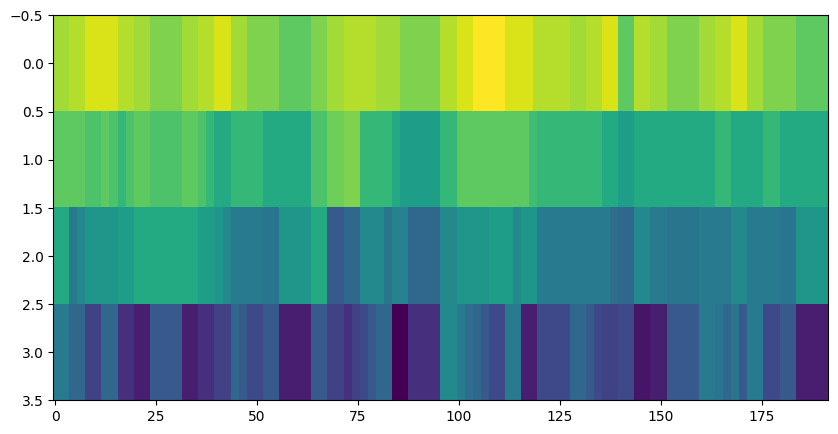

In [116]:
import json
import numpy as np
import matplotlib.pyplot as plt

data = json.load(open('data/jsb-chorales-16th.json'))
test = data['train']

seq1 = test[0]

seq1 = np.array(seq1)
plt.figure(figsize=(10, 5))
plt.imshow(seq1.T, aspect='auto')    
plt.show()

SATB = {
    0: 0,
    1: 2,
    2: 4,
    3: 5,
}

for i_time, notes in enumerate(seq1):
    for i_note, note in enumerate(notes):
        outport.send(mido.Message('note_on', channel=SATB[i_note], note=note, velocity=127, time=i_time))
    outport.send(mido.Message('note_off', note=note, velocity=127, time=i_time))


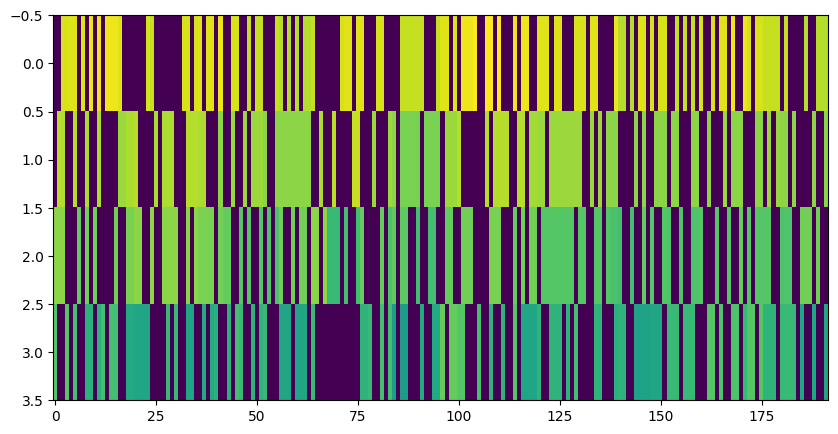

In [119]:
import numpy as np

masked_seq1 = np.array(seq1.copy())
timesteps = len(seq1)
notes = len(seq1[0])
mask_percentage = 0.50

random_mask = np.random.rand(timesteps, notes) < mask_percentage
masked_seq1[random_mask] = -1

plt.figure(figsize=(10, 5))
plt.imshow(masked_seq1.T, aspect='auto')    
plt.show()

for i_time, notes in enumerate(masked_seq1):
    for i_note, note in enumerate(notes):
        if note != -1:
            outport.send(mido.Message('note_on', channel=SATB[i_note], note=note, velocity=127, time=i_time))
    if note != -1:
        outport.send(mido.Message('note_off', note=note, velocity=127, time=i_time))